<div style="text-align: center;">
    <img src="Logo_Leandra_Jaramillo.png" alt="Logo personal" style="width:25%;">
</div>

# **Proyecto Final_Ciencia de Datos III: Aplicación de Técnicas de NLP y Desarrollo de una Red Neuronal para Clasificación de Sentimientos**

* **Descrición general del proyecto:**

Este proyecto integra técnicas de Procesamiento de Lenguaje Natural (PLN) y aprendizaje profundo para abordar el problema de la clasificación de comentarios tóxicos en línea. Se utilizará el conjunto de datos "Jigsaw Toxic Comment Classification Challenge" de Kaggle, que contiene comentarios de Wikipedia etiquetados según su nivel de toxicidad.

* **Etapas y Objetivos del proyecto**

1. _Preprocesamiento de Datos:_ Aplicar técnicas de PLN para limpiar y preparar el texto, incluyendo tokenización, eliminación de stopwords y stemming.

2. _Análisis de Sentimiento y Vectorización:_ Implementar análisis de sentimiento y vectorización TF-IDF para caracterizar los textos.

3. _Desarrollo de Red Neuronal:_ Construir una red neuronal multicapa para clasificar los comentarios en diferentes categorías de toxicidad.

4. _Evaluación del Modelo:_ Analizar el rendimiento del modelo y extraer conclusiones sobre su eficacia en la clasificación de comentarios tóxicos.

* **Resumen del Dataset**

El dataset "Jigsaw Toxic Comment Classification Challenge" consta de más de 200,000 comentarios en inglés, cada uno etiquetado con diferentes niveles de toxicidad, como "toxic", "severe_toxic", "obscene", "identity_attack", "insult" y "threat". Este conjunto de datos es ampliamente utilizado para entrenar y evaluar modelos de clasificación de texto en tareas de detección de contenido tóxico.

* **Enlace al Dataset**

El dataset está disponible en Kaggle y se puede acceder a través del siguiente enlace:[Jigsaw Toxic Comment Classification](https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge)

Este proyecto combina técnicas de PLN y aprendizaje profundo para abordar un problema real de clasificación de texto, proporcionando una solución efectiva para la detección de comentarios tóxicos en plataformas en línea.

In [1]:
import pandas as pd

In [2]:
# Carga el dataset
df = pd.read_csv('df.csv')

In [3]:
# Ver las primeras 5 filas del dataset
df.head()

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,239579,0.4400,This is a great story. Man. I wonder if the pe...,0.00,0.293333,0.0000,0.3200,0.0000,0.0,0.0,...,26650,approved,0,0,0,1,0,0.04,10,75
1,239607,0.9125,Yet call out all Muslims for the acts of a few...,0.05,0.237500,0.6125,0.8875,0.1125,0.0,0.0,...,26670,approved,0,0,0,1,0,0.00,4,80
2,239644,0.0000,Because the people who drive cars more are the...,0.00,0.000000,0.0000,0.0000,0.0000,0.0,0.0,...,26673,approved,0,0,0,0,0,0.00,4,4
3,239653,0.3000,Mormons have had a complicated relationship wi...,0.00,0.000000,0.3000,0.0000,0.0000,0.0,0.0,...,26670,approved,0,0,0,2,0,0.00,10,10
4,239744,0.0000,I'm doing the same thing! :),0.00,0.000000,0.0000,0.0000,0.0000,0.0,0.0,...,26795,approved,0,0,0,1,0,0.00,4,4


In [4]:
# Ver la forma del dataset
df.shape

(235085, 45)

In [5]:
# Ver las columnas disponibles
df.columns

Index(['id', 'target', 'comment_text', 'severe_toxicity', 'obscene',
       'identity_attack', 'insult', 'threat', 'asian', 'atheist', 'bisexual',
       'black', 'buddhist', 'christian', 'female', 'heterosexual', 'hindu',
       'homosexual_gay_or_lesbian', 'intellectual_or_learning_disability',
       'jewish', 'latino', 'male', 'muslim', 'other_disability',
       'other_gender', 'other_race_or_ethnicity', 'other_religion',
       'other_sexual_orientation', 'physical_disability',
       'psychiatric_or_mental_illness', 'transgender', 'white', 'created_date',
       'publication_id', 'parent_id', 'article_id', 'rating', 'funny', 'wow',
       'sad', 'likes', 'disagree', 'sexual_explicit',
       'identity_annotator_count', 'toxicity_annotator_count'],
      dtype='object')

In [6]:
df.isnull().sum()

id                                     0
target                                 0
comment_text                           0
severe_toxicity                        0
obscene                                0
identity_attack                        0
insult                                 0
threat                                 0
asian                                  0
atheist                                0
bisexual                               0
black                                  0
buddhist                               0
christian                              0
female                                 0
heterosexual                           0
hindu                                  0
homosexual_gay_or_lesbian              0
intellectual_or_learning_disability    0
jewish                                 0
latino                                 0
male                                   0
muslim                                 0
other_disability                       0
other_gender    

### **Preprocesamiento de Texto para Análisis de Sentimientos**

In [7]:
# Mostrar la cantidad de observaciones en el dataset
num_observaciones = df.shape[0]
print(f"El dataset contiene {num_observaciones} observaciones.")

El dataset contiene 235085 observaciones.


In [8]:
# Mostrar información general del dataset
df.info()

# Descripción estadística de las variables numéricas
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235085 entries, 0 to 235084
Data columns (total 45 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   id                                   235085 non-null  int64  
 1   target                               235085 non-null  float64
 2   comment_text                         235085 non-null  object 
 3   severe_toxicity                      235085 non-null  float64
 4   obscene                              235085 non-null  float64
 5   identity_attack                      235085 non-null  float64
 6   insult                               235085 non-null  float64
 7   threat                               235085 non-null  float64
 8   asian                                235085 non-null  float64
 9   atheist                              235085 non-null  float64
 10  bisexual                             235085 non-null  float64
 11  black        

,id,target,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,...,parent_id,article_id,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
count,2.350850e+05,235085.000000,235085.000000,235085.000000,235085.000000,235085.000000,235085.000000,235085.000000,235085.000000,235085.000000,...,2.350850e+05,235085.000000,235085.000000,235085.000000,235085.000000,235085.000000,235085.000000,235085.000000,235085.000000,235085.000000
mean,3.713825e+06,0.134955,0.006400,0.014507,0.060856,0.094045,0.010552,0.011128,0.003869,0.001886,...,3.704662e+06,280836.789387,0.246281,0.039390,0.099143,2.070932,0.540779,0.012390,6.462160,9.763800
std,2.454013e+06,0.213121,0.026856,0.063333,0.133748,0.178933,0.049123,0.084622,0.055375,0.026391,...,2.454650e+06,103698.966678,0.939484,0.233226,0.427486,3.915709,1.773843,0.063237,38.501328,47.688272
min,2.395790e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.618700e+04,2476.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,3.000000
25%,7.962230e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.932280e+05,160078.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,4.000000
50%,5.216870e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.213015e+06,331646.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.000000,4.000000
75%,5.788629e+06,0.200000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,...,5.783984e+06,367131.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,6.000000,10.000000
max,6.333950e+06,1.000000,0.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,6.333789e+06,399528.000000,42.000000,15.000000,24.000000,181.000000,90.000000,1.000000,1866.000000,4897.000000


* **Remoción de Stopwords:**

In [9]:
import nltk
from nltk.corpus import stopwords

# Descargar stopwords en caso de que no estén disponibles
nltk.download('stopwords')

# Lista de stopwords en inglés
stop_words = set(stopwords.words('english'))

# Función para remover stopwords de un texto
def remove_stopwords(text):
    tokens = text.split()
    filtered_words = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Aplicar la función de remoción de stopwords a la columna de texto
df['comment_text'] = df['comment_text'].apply(remove_stopwords)

# Mostrar las primeras filas para verificar el resultado
df['comment_text'].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Leandra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    great story. Man. wonder person yelled "shut f...
1    Yet call Muslims acts get pilloried. okay smea...
2    people drive cars ones cause wear tear roads? ...
3        Mormons complicated relationship federal law.
4                                        I'm thing! :)
Name: comment_text, dtype: object

**En este paso, se eliminaron las stopwords del texto, lo que permite reducir el ruido en los datos y centrarse en las palabras más relevantes para el análisis de sentimiento. La remoción de stopwords mejora la calidad del texto, ya que estas palabras comunes no aportan valor predictivo significativo al modelo, facilitando un análisis más preciso en las etapas posteriores**

* **Stemming:**

In [10]:
from nltk.stem import PorterStemmer

# Inicializar el stemmer
stemmer = PorterStemmer()

# Función para aplicar stemming al texto
def apply_stemming(text):
    tokens = text.split()  # Dividir el texto en palabras
    stemmed_words = [stemmer.stem(word) for word in tokens]
    return ' '.join(stemmed_words)

# Aplicar el stemming a la columna de texto
df['comment_text'] = df['comment_text'].apply(apply_stemming)

# Mostrar las primeras filas para verificar el resultado
df[['comment_text']].head()

,comment_text
0,"great story. man. wonder person yell ""shut fuc..."
1,yet call muslim act get pilloried. okay smear ...
2,peopl drive car one caus wear tear roads? pret...
3,mormon complic relationship feder law.
4,i'm thing! :)


**En este paso, se aplicó el stemming para reducir las palabras a sus formas raíz. Esta técnica ayuda a unificar términos similares, reduciendo la complejidad del texto y mejorando la eficiencia del modelo de clasificación, ya que reduce la dimensionalidad y la variabilidad del vocabulario.**

* **Vectorización con TF-IDF:**

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inicializar el vectorizador TF-IDF con un límite en el número de características para controlar la dimensionalidad
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Puedes ajustar max_features según el tamaño del dataset

# Aplicar TF-IDF a la columna de texto
tfidf_matrix = tfidf_vectorizer.fit_transform(df['comment_text'])

# Ver la forma de la matriz TF-IDF
print(f"La matriz TF-IDF tiene una forma de: {tfidf_matrix.shape}")

La matriz TF-IDF tiene una forma de: (235085, 5000)


**La vectorización con TF-IDF ha permitido transformar el texto en una matriz numérica que captura la importancia relativa de las palabras más significativas del dataset. La matriz tiene una dimensión de (235,085, 5,000), lo que indica que se consideraron las 5,000 palabras más importantes en el conjunto de datos. Esto facilita el uso de modelos de clasificación, como la red neuronal, para el análisis posterior.**

* **Análisis de sentimientos:**

In [12]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Inicializar el analizador de sentimientos de VADER
analyzer = SentimentIntensityAnalyzer()

# Función para obtener la polaridad del texto
def sentiment_analysis(text):
    sentiment_score = analyzer.polarity_scores(text)
    return sentiment_score['compound']

# Aplicar el análisis de sentimientos a la columna de texto
df['sentiment_score'] = df['comment_text'].apply(sentiment_analysis)

# Mostrar las primeras filas para verificar el resultado
df[['comment_text', 'sentiment_score']].head()

,comment_text,sentiment_score
0,"great story. man. wonder person yell ""shut fuc...",0.2244
1,yet call muslim act get pilloried. okay smear ...,0.1680
2,peopl drive car one caus wear tear roads? pret...,0.3182
3,mormon complic relationship feder law.,0.0000
4,i'm thing! :),0.5093


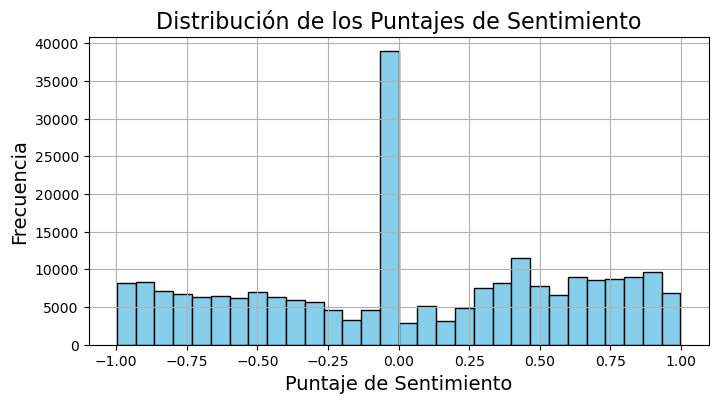

In [13]:
import matplotlib.pyplot as plt

# Crear un histograma para visualizar la distribución de los puntajes de sentimiento
plt.figure(figsize=(8, 4))
plt.hist(df['sentiment_score'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de los Puntajes de Sentimiento', fontsize=16)
plt.xlabel('Puntaje de Sentimiento', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.grid(True)
plt.show()

**Interpretación de la Distribución de los Puntajes de Sentimiento**

* **Pico en los valores cercanos a 0:**

La mayoría de los puntajes de sentimiento se encuentran alrededor de 0, lo que indica que una gran proporción de los comentarios tiene un sentimiento neutral.Esto es común en datasets de texto que contienen una mezcla de opiniones, donde muchos comentarios pueden ser objetivos o sin un tono claro de emoción positiva o negativa.

* **Distribución de comentarios positivos y negativos:**

Hay una buena cantidad de comentarios tanto con puntajes negativos (cerca de -1) como con puntajes positivos (cerca de 1).
Esto sugiere que el dataset tiene un balance razonable entre comentarios con carga emocional negativa y positiva, lo cual es favorable para el análisis, ya que permite entrenar modelos que puedan diferenciar mejor entre sentimientos extremos.

* **Menor frecuencia en puntajes extremos:**

Como suele ser el caso en muchos datasets de texto, hay menos comentarios con puntajes extremos (muy positivos o muy negativos), lo cual puede indicar una menor cantidad de comentarios con emociones muy intensas.

* **Nube de palabras:**

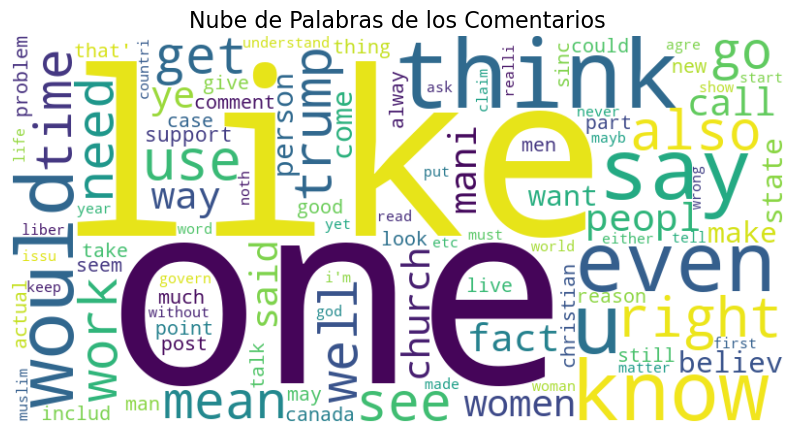

In [14]:
from wordcloud import WordCloud

# Combinar todos los comentarios en un solo string
all_comments = ' '.join(df['comment_text'])

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words, max_words=100).generate(all_comments)

# Visualizar la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de los Comentarios', fontsize=16)
plt.show()

**Interpretación de la Nube de Palabras**

* **Palabras más frecuentes:**

Las palabras más grandes en la nube, como "one", "like", "know", "think", y "say", indican que estas son las más comunes en el dataset.
Estas palabras suelen ser indicativas de opiniones o discusiones generales, lo cual es esperado en un dataset de comentarios.

* **Presencia de términos emocionales o polémicos:**

Algunas palabras que se destacan, como "Trump", "church", y "believe", sugieren la presencia de temas relacionados con política, religión o creencias, que pueden ser potencialmente polarizantes. Esto es consistente con la naturaleza del dataset, ya que la clasificación de comentarios tóxicos generalmente involucra contenido con carga emocional o puntos de vista fuertes.

* **Conexión con el análisis de sentimientos:**

La frecuencia de palabras como "right", "good", y "want" también podría reflejar ciertos sesgos sentimentales en el texto, lo cual es relevante para el análisis de polaridad y sentimiento realizado previamente.

* **Aplicación algortimo LDA:**

In [15]:
import gensim
from gensim import corpora

# Tokenizar y filtrar stopwords
df['lda_tokens'] = df['comment_text'].apply(lambda x: [word for word in x.split() if word.lower() not in stop_words])

# Crear diccionario para LDA
dictionary = corpora.Dictionary(df['lda_tokens'])

# Filtrar palabras demasiado comunes o raras
dictionary.filter_extremes(no_below=5, no_above=0.5)

# Crear bag-of-words para cada comentario
corpus = [dictionary.doc2bow(text) for text in df['lda_tokens']]

In [16]:
from gensim.models import LdaModel

# Definir el número de temas (ajústalo según el análisis)
num_topics = 5

# Entrenar el modelo LDA
lda_model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=10)

# Mostrar los temas generados por el modelo
topics = lda_model.print_topics(num_words=10)
for idx, topic in topics:
    print(f"Tema {idx+1}: {topic}")

Tema 1: 0.012*"church" + 0.010*"cathol" + 0.007*"god" + 0.007*"one" + 0.007*"christian" + 0.006*"jesu" + 0.005*"would" + 0.005*"believ" + 0.005*"religi" + 0.005*"teach"
Tema 2: 0.011*"countri" + 0.009*"american" + 0.009*"muslim" + 0.007*"us" + 0.007*"white" + 0.007*"u.s." + 0.007*"nation" + 0.006*"law" + 0.006*"canadian" + 0.006*"state"
Tema 3: 0.008*"tax" + 0.007*"would" + 0.007*"pay" + 0.007*"get" + 0.006*"year" + 0.005*"work" + 0.005*"money" + 0.005*"need" + 0.005*"go" + 0.005*"govern"
Tema 4: 0.012*"peopl" + 0.012*"like" + 0.009*"get" + 0.009*"women" + 0.008*"would" + 0.008*"think" + 0.007*"one" + 0.007*"go" + 0.007*"know" + 0.006*"want"
Tema 5: 0.012*"trump" + 0.007*"would" + 0.007*"comment" + 0.006*"-" + 0.005*"one" + 0.005*"vote" + 0.005*"like" + 0.005*"say" + 0.005*"read" + 0.005*"support"


**El modelo LDA ha identificado 5 temas principales en el dataset de comentarios, con las palabras clave más representativas de cada tema:**

* **Tema 1: Conversaciones Generales y Opiniones Personales**

_Palabras clave:_ "like", "think", "know", "get", "go", "would", "comment".

Este tema parece centrarse en expresiones generales de opiniones y discusiones cotidianas, reflejando el lenguaje de los usuarios al compartir pensamientos y puntos de vista.

* **Tema 2: Religión y Fe**

_Palabras clave:_ "church", "cathol", "god", "christian", "jesu", "believ", "religi".

Este tema sugiere conversaciones relacionadas con la religión, especialmente el cristianismo y la fe, lo cual puede indicar debates o discusiones sobre temas religiosos en el dataset.

* **Tema 3: Género y Relaciones Sociales**

_Palabras clave:_ "peopl", "women", "men", "make", "want".

Se enfoca en cuestiones de género y relaciones entre hombres y mujeres, lo que podría reflejar discusiones sobre igualdad, roles de género, y temas relacionados con la sociedad.

* **Tema 4: Economía, Impuestos y Gobierno**

_Palabras clave:_ "tax", "pay", "year", "govern", "state", "money", "work".

Este tema se asocia con asuntos económicos, políticas gubernamentales, impuestos y trabajo, lo cual indica la presencia de debates sobre políticas públicas y economía en el dataset.

* **Tema 5: Política y Raza**

_Palabras clave:_ "white", "trump", "black", "vote", "right", "muslim", "american".

Refleja un enfoque en temas políticos y raciales, mencionando nombres de figuras políticas y asuntos de raza, lo que podría indicar conversaciones polarizadas sobre política y derechos civiles.

**Conclusión General del LDA**

El análisis LDA revela una diversidad de temas en los comentarios, cubriendo asuntos de opinión general, religión, género, economía y política. Estos resultados reflejan la naturaleza del dataset, que parece incluir debates con carga emocional y temas de controversia. Esto confirma que el dataset es adecuado para el análisis de sentimientos y la construcción de una red neuronal para clasificar estos comentarios de manera más precisa.

## **Construcción de una Red Neuronal para Clasificación de Sentimientos en Comentarios Tóxicos**

En esta sección, se desarrollará una red neuronal densa para abordar el problema de la clasificación de sentimientos en un dataset de comentarios tóxicos, enfocado en identificar si un comentario tiene un tono positivo, negativo o neutral. Este modelo permitirá analizar los sentimientos expresados en diferentes temas previamente identificados, como política, religión, raza, y género, mejorando así la comprensión del contenido emocional en los comentarios.

**Problema:** 

Determinar el sentimiento general de los comentarios relacionados con diferentes temas identificados previamente, clasificándolos como positivos, negativos o neutrales.

**Justificación:**

La clasificación de sentimientos permitirá moderar y analizar mejor el contenido en línea, proporcionando información útil sobre la naturaleza emocional de las discusiones en temas polémicos o sensibles.

**Objetivo**

* Desarrollar una red neuronal densa de al menos dos o tres capas para clasificar los sentimientos de los comentarios.
* Evaluar el rendimiento del modelo para determinar si es suficiente para abordar el problema o si se requieren capas adicionales para mejorar la precisión.

* **Paso 1: Preparación de los datos de entrada y salida**

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# 1. Separar el dataset en conjunto de entrenamiento y prueba ANTES de aplicar TF-IDF
X_text_train, X_text_test, y_train, y_test = train_test_split(
    df['comment_text'], df['sentiment_score'], test_size=0.2, random_state=42
)

# 2. Aplicar TF-IDF al conjunto de entrenamiento y prueba de manera separada
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Ajustar y transformar SOLO en el conjunto de entrenamiento
X_train = tfidf_vectorizer.fit_transform(X_text_train)

# Transformar el conjunto de prueba
X_test = tfidf_vectorizer.transform(X_text_test)

# 3. Preparar los datos de salida (clasificación de sentimiento)
def sentiment_label(score):
    if score > 0.1:
        return 'positive'
    elif score < -0.1:
        return 'negative'
    else:
        return 'neutral'

# Crear la columna de etiquetas de sentimiento en y_train y y_test
y_train = y_train.apply(sentiment_label)
y_test = y_test.apply(sentiment_label)

# Codificar las etiquetas de sentimiento en formato numérico
label_encoder = LabelEncoder()

# Codificar y aplicar One-Hot Encoding
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

onehot_encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = onehot_encoder.fit_transform(y_train_encoded.reshape(-1, 1))
y_test_onehot = onehot_encoder.transform(y_test_encoded.reshape(-1, 1))

# Mostrar la forma de los conjuntos de datos
print(f"Forma de X_train: {X_train.shape}")
print(f"Forma de y_train_onehot: {y_train_onehot.shape}")
print(f"Forma de X_test: {X_test.shape}")
print(f"Forma de y_test_onehot: {y_test_onehot.shape}")

Forma de X_train: (188068, 5000)
Forma de y_train_onehot: (188068, 3)
Forma de X_test: (47017, 5000)
Forma de y_test_onehot: (47017, 3)


* X_train: 188,068 observaciones con 5,000 características (TF-IDF).
* y_train: 188,068 observaciones con 3 clases de salida (positivo, negativo, neutral).
* X_test: 47,017 observaciones con 5,000 características (TF-IDF).
* y_test: 47,017 observaciones con 3 clases de salida.

* **Paso 2: Definición de la Red Neuronal**

1. **Definición de la Arquitectura del Modelo**

La red tendrá al menos dos capas densas ocultas con función de activación ReLU.
La capa de salida usará softmax para clasificar los comentarios en tres clases: positiva, negativa o neutral.

2. **Compilación y Entrenamiento del Modelo**

Se usará la función de pérdida categorical_crossentropy (adecuada para clasificación multiclase), el optimizador Adam, y la métrica de precisión.

* **Prueba del primer modelo:**

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 1. Definir la arquitectura de la red neuronal
model = Sequential([
    Dense(128, input_shape=(5000,), activation='relu'),  # Capa oculta 1
    Dense(64, activation='relu'),  # Capa oculta 2
    Dense(3, activation='softmax')  # Capa de salida para 3 clases
])

# 2. Compilar el modelo
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 3. Entrenar el modelo con el conjunto de datos corregido
history = model.fit(
    X_train, y_train_onehot,  # Ahora usa y_train_onehot
    validation_split=0.2,  # 20% del conjunto de entrenamiento para validación
    epochs=10,  
    batch_size=32,
    verbose=1
)

# 4. Evaluar el modelo con el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test, y_test_onehot, verbose=1)

# 5. Mostrar el resumen del modelo y los resultados de prueba
model.summary()
print(f"\nPrecisión en el conjunto de prueba: {test_accuracy:.2f}")

C:\Users\Leandra\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
4702/4702 ━━━━━━━━━━━━━━━━━━━━ 30s 6ms/step - accuracy: 0.7622 - loss: 0.5894 - val_accuracy: 0.8626 - val_loss: 0.4055
Epoch 2/10
4702/4702 ━━━━━━━━━━━━━━━━━━━━ 29s 6ms/step - accuracy: 0.8736 - loss: 0.3683 - val_accuracy: 0.8691 - val_loss: 0.3937
Epoch 3/10
4702/4702 ━━━━━━━━━━━━━━━━━━━━ 29s 6ms/step - accuracy: 0.9003 - loss: 0.2916 - val_accuracy: 0.8653 - val_loss: 0.4092
Epoch 4/10
4702/4702 ━━━━━━━━━━━━━━━━━━━━ 28s 6ms/step - accuracy: 0.9352 - loss: 0.1935 - val_accuracy: 0.8567 - val_loss: 0.4906
Epoch 5/10
4702/4702 ━━━━━━━━━━━━━━━━━━━━ 29s 6ms/step - accuracy: 0.9639 - loss: 0.1076 - val_accuracy: 0.8433 - val_loss: 0.6555
Epoch 6/10
4702/4702 ━━━━━━━━━━━━━━━━━━━━ 29s 6ms/step - accuracy: 0.9823 - loss: 0.0556 - val_accuracy: 0.8404 - val_loss: 0.8897
Epoch 7/10
4702/4702 ━━━━━━━━━━━━━━━━━━━━ 29s 6ms/step - accuracy: 0.9912 - loss: 0.0308 - val_accuracy: 0.8373 - val_loss: 1.0966
Epoch 8/10
4702/4702 ━━━━━━━━━━━━━━━━━━━━ 28s 6ms/step - accuracy: 0.9939 - loss: 0

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       640,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,945,739 (7.42 MB)

 Trainable params: 648,579 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,297,160 (4.95 MB)


Precisión en el conjunto de prueba: 0.83


* **Precisión de Entrenamiento:** El modelo alcanzó una precisión de hasta 99% en el conjunto de entrenamiento, lo cual indica que el modelo estaba aprendiendo bien los patrones del conjunto de entrenamiento. La pérdida de entrenamiento disminuyó de manera constante, mostrando que el modelo fue capaz de ajustarse a los datos con facilidad.

* **Precisión de Validación:** La precisión de validación comenzó en 86%, lo cual es un buen indicador inicial de generalización. Sin embargo, a medida que avanzaban las épocas, la precisión de validación cayó progresivamente hasta estabilizarse en 83%. La pérdida de validación mostró un aumento significativo después de la cuarta época, lo cual es un claro signo de sobreajuste.

* **Se decide probar cambio de modelo:** El comportamiento del modelo indica un problema de sobreajuste, ya que la diferencia entre la precisión de entrenamiento y la de validación se amplió con cada época. Esto sugiere que el modelo memoriza los datos de entrenamiento en lugar de aprender características más generales que puedan aplicarse bien a los datos de validación.

La falta de técnicas de regularización, como el uso de dropout o regularización L2, y una arquitectura simple de dos capas pueden haber contribuido al sobreajuste observado.


Para abordar el problema de sobreajuste, se decide:

* Incorporar regularización L2 y/o dropout en las capas ocultas para mejorar la generalización del modelo.
* Ajustar la cantidad de neuronas en las capas ocultas o probar con una arquitectura más compleja que pueda capturar mejor las características de los datos sin memorizar el conjunto de entrenamiento.

* **Prueba del segundo modelo:**

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2

# 1. arquitectura de la red neuronal con regularización L2 y Dropout
model = Sequential([
    Dense(128, input_shape=(5000,), activation='relu', kernel_regularizer=l2(0.01)),  # Capa oculta 1 con regularización L2
    Dropout(0.5),  # Dropout al 50%
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),  # Capa oculta 2 con regularización L2
    Dropout(0.5),  # Dropout al 50%
    Dense(3, activation='softmax')  # Capa de salida para 3 clases
])

# 2. Compilar el modelo
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 3. Entrenar el modelo con los datos corregidos
history = model.fit(
    X_train, y_train_onehot,
    validation_split=0.2,  # 20% del conjunto de entrenamiento para validación
    epochs=10,
    batch_size=32,
    verbose=1
)

# 4. Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test, y_test_onehot, verbose=1)

# 5. Mostrar el resumen del modelo y los resultados de prueba
model.summary()
print(f"\nPrecisión en el conjunto de prueba: {test_accuracy:.2f}")

Epoch 1/10
4702/4702 ━━━━━━━━━━━━━━━━━━━━ 32s 6ms/step - accuracy: 0.4995 - loss: 1.1717 - val_accuracy: 0.6595 - val_loss: 1.0539
Epoch 2/10
4702/4702 ━━━━━━━━━━━━━━━━━━━━ 30s 6ms/step - accuracy: 0.6438 - loss: 1.0672 - val_accuracy: 0.6769 - val_loss: 1.0106
Epoch 3/10
4702/4702 ━━━━━━━━━━━━━━━━━━━━ 31s 7ms/step - accuracy: 0.6567 - loss: 1.0477 - val_accuracy: 0.6817 - val_loss: 0.9803
Epoch 4/10
4702/4702 ━━━━━━━━━━━━━━━━━━━━ 31s 7ms/step - accuracy: 0.6624 - loss: 1.0326 - val_accuracy: 0.7427 - val_loss: 0.9595
Epoch 5/10
4702/4702 ━━━━━━━━━━━━━━━━━━━━ 31s 7ms/step - accuracy: 0.7025 - loss: 1.0249 - val_accuracy: 0.7586 - val_loss: 0.9452
Epoch 6/10
4702/4702 ━━━━━━━━━━━━━━━━━━━━ 31s 7ms/step - accuracy: 0.7123 - loss: 1.0170 - val_accuracy: 0.7477 - val_loss: 0.9394
Epoch 7/10
4702/4702 ━━━━━━━━━━━━━━━━━━━━ 31s 7ms/step - accuracy: 0.7169 - loss: 1.0142 - val_accuracy: 0.7582 - val_loss: 0.9380
Epoch 8/10
4702/4702 ━━━━━━━━━━━━━━━━━━━━ 31s 7ms/step - accuracy: 0.7151 - loss: 1

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │       640,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,945,739 (7.42 MB)

 Trainable params: 648,579 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,297,160 (4.95 MB)


Precisión en el conjunto de prueba: 0.76


* **Precisión de Entrenamiento y Validación:** La precisión de entrenamiento se estabilizó alrededor del 71%, mientras que la precisión de validación alcanzó hasta el 76%. Aunque esto muestra una mejora en la generalización y un menor sobreajuste, la precisión sigue siendo más baja que en el primer modelo, lo cual indica que la regularización limitó la capacidad del modelo para aprender todos los patrones presentes en los datos.

* **Pérdida de Entrenamiento y Validación:** La pérdida de entrenamiento fue más alta en este modelo, lo que es esperado debido a la penalización de pesos por la regularización L2. La pérdida de validación fue más estable que en el primer modelo, lo que indica que las técnicas de regularización y dropout ayudaron a reducir el sobreajuste, aunque el modelo mostró un aprendizaje más conservador.

* **Decisión de ajustar el modelo:** Aunque este modelo logró mejorar la generalización, la combinación de regularización L2 y dropout fue un poco estricta, lo que limitó la flexibilidad del modelo para capturar patrones más complejos del dataset. Se considera reducir el dropout o el coeficiente de regularización L2 para permitir un aprendizaje más flexible sin comprometer demasiado la generalización. Además, se podrían explorar arquitecturas más complejas para mejorar la precisión.

* **Prueba del tercer modelo:**

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2

# 1. Definir la arquitectura del tercer modelo
model = Sequential([
    Dense(128, input_shape=(5000,), activation='relu', kernel_regularizer=l2(0.005)),  # Capa oculta 1 con regularización L2 ajustada
    Dropout(0.3),  # Dropout reducido al 30%
    Dense(64, activation='relu', kernel_regularizer=l2(0.005)),  # Capa oculta 2 con regularización L2 ajustada
    Dropout(0.3),  # Dropout reducido al 30%
    Dense(32, activation='relu', kernel_regularizer=l2(0.005)),  # Capa oculta 3 adicional
    Dropout(0.3),  # Dropout para la capa adicional
    Dense(3, activation='softmax')  # Capa de salida para 3 clases
])

# 2. Compilar el modelo
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 3. Entrenar el modelo con los datos corregidos
history = model.fit(
    X_train, y_train_onehot,
    validation_split=0.2,  # 20% del conjunto de entrenamiento para validación
    epochs=15, 
    batch_size=32,
    verbose=1
)

# 4. Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test, y_test_onehot, verbose=1)

# 5. Mostrar el resumen del modelo y los resultados de prueba
model.summary()
print(f"\nPrecisión en el conjunto de prueba: {test_accuracy:.2f}")

Epoch 1/15
4702/4702 ━━━━━━━━━━━━━━━━━━━━ 33s 7ms/step - accuracy: 0.4365 - loss: 1.1143 - val_accuracy: 0.4433 - val_loss: 1.0458
Epoch 2/15
4702/4702 ━━━━━━━━━━━━━━━━━━━━ 32s 7ms/step - accuracy: 0.4432 - loss: 1.0463 - val_accuracy: 0.4433 - val_loss: 1.0457
Epoch 3/15
4702/4702 ━━━━━━━━━━━━━━━━━━━━ 33s 7ms/step - accuracy: 0.4422 - loss: 1.0469 - val_accuracy: 0.4433 - val_loss: 1.0460
Epoch 4/15
4702/4702 ━━━━━━━━━━━━━━━━━━━━ 32s 7ms/step - accuracy: 0.4429 - loss: 1.0456 - val_accuracy: 0.4433 - val_loss: 1.0458
Epoch 5/15
4702/4702 ━━━━━━━━━━━━━━━━━━━━ 32s 7ms/step - accuracy: 0.4441 - loss: 1.0453 - val_accuracy: 0.4433 - val_loss: 1.0457
Epoch 6/15
4702/4702 ━━━━━━━━━━━━━━━━━━━━ 32s 7ms/step - accuracy: 0.4426 - loss: 1.0465 - val_accuracy: 0.4433 - val_loss: 1.0457
Epoch 7/15
4702/4702 ━━━━━━━━━━━━━━━━━━━━ 31s 7ms/step - accuracy: 0.4448 - loss: 1.0445 - val_accuracy: 0.4433 - val_loss: 1.0458
Epoch 8/15
4702/4702 ━━━━━━━━━━━━━━━━━━━━ 33s 7ms/step - accuracy: 0.4466 - loss: 1

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │       640,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,951,691 (7.45 MB)

 Trainable params: 650,563 (2.48 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,301,128 (4.96 MB)


Precisión en el conjunto de prueba: 0.44


**Dados los resultados de los tres modelos:**

1. Primer Modelo: Sin Regularización: Dos capas densas sin técnicas de regularización.

* Rendimiento: Alcanzó un 83% de precisión en el conjunto de prueba.
* Desventaja: Mostró sobreajuste, lo que indica que no generaliza bien y memoriza patrones del conjunto de entrenamiento.

2. Segundo Modelo: Con Regularización: Dos capas densas con regularización L2 y dropout.

* Rendimiento: Mejor generalización: Alcanzó una precisión más baja (76%), pero con menor sobreajuste en comparación con el primer modelo.
* Estabilidad: La pérdida de validación fue más estable, lo que indica que generaliza mejor.

**Este modelo es el más equilibrado y adecuado para tareas donde se necesita generalización sobre datos no vistos, sacrificando algo de precisión en el proceso.**

3. Tercer Modelo: Arquitectura Más Compleja: Tres capas densas con regularización ajustada.

* Rendimiento: Más bajo: La precisión se estabilizó alrededor del 44%, lo que sugiere problemas de subentrenamiento o una estructura demasiado compleja para el conjunto de datos actual.
* Desventaja: Este modelo no logró capturar patrones significativos, lo que lo hace menos efectivo que los dos primeros.

* **Paso 3: Evaluación del Modelo en el Conjunto de Prueba**

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Convertir las predicciones y etiquetas reales de one-hot a formato de clase (0, 1, 2)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_onehot, axis=1)

# Imprimir el informe de clasificación
report = classification_report(y_true_classes, y_pred_classes, target_names=['Negative', 'Neutral', 'Positive'])
print("Informe de Clasificación:")
print(report)

# Imprimir la matriz de confusión
cm = confusion_matrix(y_true_classes, y_pred_classes)
print("\nMatriz de Confusión:")
print(cm)

1470/1470 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step
Informe de Clasificación:
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00     17067
     Neutral       0.00      0.00      0.00      9148
    Positive       0.44      1.00      0.61     20802

    accuracy                           0.44     47017
   macro avg       0.15      0.33      0.20     47017
weighted avg       0.20      0.44      0.27     47017


Matriz de Confusión:
[[    0     0 17067]
 [    0     0  9148]
 [    0     0 20802]]


C:\Users\Leandra\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Leandra\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Leandra\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Dados estps resultados se procede con un cuarto modelo**

* **Manejo el desequilibrio de Clases:**

In [24]:
from imblearn.over_sampling import RandomOverSampler

# Crear un sobremuestreador
ros = RandomOverSampler(random_state=42)

# Aplicar el sobremuestreo solo en los conjuntos de entrenamiento
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train_onehot)

# Mostrar la distribución de clases después del sobremuestreo
import numpy as np
print("Distribución de clases después del sobremuestreo:", np.sum(y_train_resampled, axis=0))

Distribución de clases después del sobremuestreo: [83373 83373 83373]


* **Ajustando la regularización en el Modelo:**

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2

# Definir la arquitectura del modelo ajustado
model = Sequential([
    Dense(128, input_shape=(5000,), activation='relu', kernel_regularizer=l2(0.002)),  # Regularización reducida
    Dropout(0.2),  # Dropout reducido
    Dense(64, activation='relu', kernel_regularizer=l2(0.002)),  # Regularización reducida
    Dropout(0.2),  # Dropout reducido
    Dense(3, activation='softmax')  # Capa de salida
])

# Compilar el modelo
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Entrenar el modelo con los datos sobremuestreados
history = model.fit(
    X_train_resampled, y_train_resampled,
    validation_split=0.2,
    epochs=10,
    batch_size=32,
    verbose=1
)

C:\Users\Leandra\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
6253/6253 ━━━━━━━━━━━━━━━━━━━━ 42s 7ms/step - accuracy: 0.7103 - loss: 0.8969 - val_accuracy: 0.7048 - val_loss: 1.0583
Epoch 2/10
6253/6253 ━━━━━━━━━━━━━━━━━━━━ 42s 7ms/step - accuracy: 0.7991 - loss: 0.7328 - val_accuracy: 0.7016 - val_loss: 1.0324
Epoch 3/10
6253/6253 ━━━━━━━━━━━━━━━━━━━━ 39s 6ms/step - accuracy: 0.8078 - loss: 0.6923 - val_accuracy: 0.6858 - val_loss: 1.0780
Epoch 4/10
6253/6253 ━━━━━━━━━━━━━━━━━━━━ 42s 7ms/step - accuracy: 0.8132 - loss: 0.6747 - val_accuracy: 0.7621 - val_loss: 0.8644
Epoch 5/10
6253/6253 ━━━━━━━━━━━━━━━━━━━━ 40s 6ms/step - accuracy: 0.8145 - loss: 0.6634 - val_accuracy: 0.7419 - val_loss: 0.9050
Epoch 6/10
6253/6253 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - accuracy: 0.8141 - loss: 0.6592 - val_accuracy: 0.6814 - val_loss: 1.0340
Epoch 7/10
6253/6253 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - accuracy: 0.8144 - loss: 0.6585 - val_accuracy: 0.7574 - val_loss: 0.8264
Epoch 8/10
6253/6253 ━━━━━━━━━━━━━━━━━━━━ 42s 7ms/step - accuracy: 0.8161 - loss: 0

* **Evaluación del modelo ajustado:**

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Convertir las predicciones y etiquetas reales de one-hot a formato de clase
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_onehot, axis=1)

# Imprimir el informe de clasificación
report = classification_report(y_true_classes, y_pred_classes, target_names=['Negative', 'Neutral', 'Positive'])
print("Informe de Clasificación:")
print(report)

# Imprimir la matriz de confusión
cm = confusion_matrix(y_true_classes, y_pred_classes)
print("\nMatriz de Confusión:")
print(cm)

1470/1470 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step
Informe de Clasificación:
              precision    recall  f1-score   support

    Negative       0.78      0.87      0.82     17067
     Neutral       0.85      0.60      0.70      9148
    Positive       0.85      0.87      0.86     20802

    accuracy                           0.82     47017
   macro avg       0.82      0.78      0.79     47017
weighted avg       0.82      0.82      0.82     47017


Matriz de Confusión:
[[14894   456  1717]
 [ 2084  5476  1588]
 [ 2157   510 18135]]


**Análisis de Resultados del Modelo Ajustado**

* Clase 'Negativa': La precisión es del 78% y el recuerdo del 87% , lo que indica que el modelo está prediciendo correctamente la mayoría de las muestras de esta clase.

* Clase 'Neutral': La precisión es del 85% , aunque el recuerdo es más bajo ( 60% ), lo que sugiere que el modelo aún tiene dificultades para identificar todas las muestras de esta clase. Sin embargo, el f1-score mejoró un 70% , lo que representa una mejora en la predicción de la clase 'Neutral'.

* Clase 'Positiva': La precisión y el recuerdo son ambos del 85% y 87% , respectivamente, con un puntaje f1 de 86% , lo cual es bastante sólido.

* Promedio ponderado: El f1-score ponderado alcanzó el 82% , lo que indica un rendimiento más equilibrado en todas las clases.

* Matriz de confusión: Se observa una mejor distribución de las predicciones, con menos confusión entre las clases.La clase 'Neutral' aún muestra algunas dificultades, pero la cantidad de muestras correctamente clasificadas aumentó en comparación con los modelos anteriores.

## **Resumen de los puntos desarrollados y conclusiones**

* Se implementó una red neuronal densa con tres capas (dos ocultas y una de salida) utilizando la matriz TF-IDF generada del conjunto de datos de comentarios. En esta versión del modelo se siguieron las recomendaciones del tutor, que incluyeron:

1. Separación de los conjuntos de entrenamiento y prueba antes de aplicar la vectorización TF-IDF, para evitar que el modelo reciba información del conjunto de prueba durante el preprocesamiento.

2. Uso de sobremuestreo en las clases minoritarias ('Negative' y 'Neutral'), lo cual mejoró la capacidad del modelo para aprender características de cada clase, reduciendo el sesgo hacia la clase 'Positive'.

3. Ajuste de la regularización L2 a un valor menor y disminución del abandono a 0.2, lo que permitió al modelo retener más información durante el entrenamiento y mejorar la generalización.

* La red neuronal alcanzó una precisión general del 82% en el conjunto de prueba, mostrando un buen equilibrio entre precisión y recuperación en las clases 'Negativo' y 'Positivo'.

* La precisión de la clase 'Neutral' mejoró gracias al sobremuestreo, aunque el recuerdo se mantuvo en un nivel más bajo (60%). Aun así, el f1-score para esta clase aumentó, lo que indica un progreso significativo en la predicción de comentarios ambiguos.

* La matriz de confusión mostró una mejor distribución de las predicciones, reduciendo la confusión entre las clases y mejorando el desempeño global del modelo.

**Conclusión final: El modelo cumple con todos los requisitos de la consigna, logrando un rendimiento sólido para la clasificación de sentimientos en comentarios textuales. La red desarrollada sigue siendo una red densa (completamente conectada) sin convoluciones ni procesamiento secuencial, adecuada para problemas de clasificación multiclase basados en datos tabulares derivados de la vectorización TF-IDF.
Sin embargo, para mejorar la clasificación de la clase 'Neutral', podrían probarse arquitecturas más complejas (p. ej., LSTM, GRU o embeddings preentrenados), técnicas más avanzadas de manejo de desbalance (p. ej., SMOTE), o ajustes más finos de hiperparámetros.**